In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [136]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [137]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [138]:
cdf = df[['Country','Year','Status','Adult_Mortality','infant_deaths','Life_expectancy','percentage_expenditure','Total_expenditure']]
df[pd.to_numeric(df['Life_expectancy'], errors='coerce').notnull()]
df[pd.to_numeric(df['Adult_Mortality'], errors='coerce').notnull()]
cdf.head(9)


,Country,Year,Status,Adult_Mortality,infant_deaths,Life_expectancy,percentage_expenditure,Total_expenditure
0,Afghanistan,2015,Developing,263.0,62,65.0,71.279624,8.16
1,Afghanistan,2014,Developing,271.0,64,59.9,73.523582,8.18
2,Afghanistan,2013,Developing,268.0,66,59.9,73.219243,8.13
3,Afghanistan,2012,Developing,272.0,69,59.5,78.184215,8.52
4,Afghanistan,2011,Developing,275.0,71,59.2,7.097109,7.87
5,Afghanistan,2010,Developing,279.0,74,58.8,79.679367,9.20
6,Afghanistan,2009,Developing,281.0,77,58.6,56.762217,9.42
7,Afghanistan,2008,Developing,287.0,80,58.1,25.873925,8.33
8,Afghanistan,2007,Developing,295.0,82,57.5,10.910156,6.73


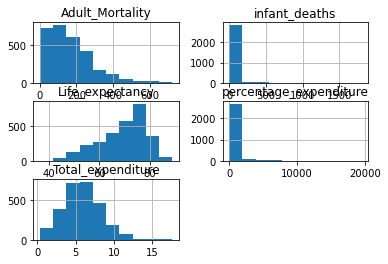

In [139]:
viz = cdf[['Adult_Mortality','infant_deaths','Life_expectancy','percentage_expenditure','Total_expenditure']]
pd.to_numeric(df.Adult_Mortality, errors='coerce').dropna()

pd.to_numeric(df.Life_expectancy, errors='coerce').dropna()
viz.hist()
plt.show()

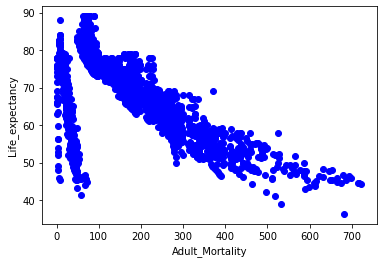

In [140]:
plt.scatter(cdf.Adult_Mortality, cdf.Life_expectancy,  color='blue')
plt.xlabel("Adult_Mortality")
plt.ylabel("Life_expectancy")
plt.show()

In [141]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

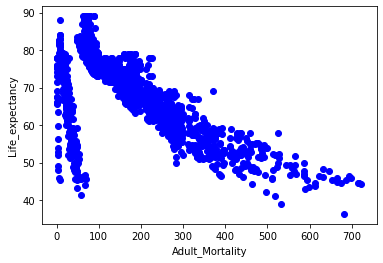

In [142]:
plt.scatter(train.Adult_Mortality, train.Life_expectancy,  color='blue')
plt.xlabel("Adult_Mortality")
plt.ylabel("Life_expectancy")
plt.show()

In [147]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


train_x = np.asanyarray(train[['Adult_Mortality']])
train_y = np.asanyarray(train[['Life_expectancy']])
np.isnan(train_x).any() 
np.isnan(train_y).any()

train_x[np.isnan(train_x)] = np.median(train_x[~np.isnan(train_x)])
train_y[np.isnan(train_y)] = np.median(train_y[~np.isnan(train_y)])


regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.05299507]]
Intercept:  [77.9358266]


Text(0, 0.5, 'Life_expectancy')

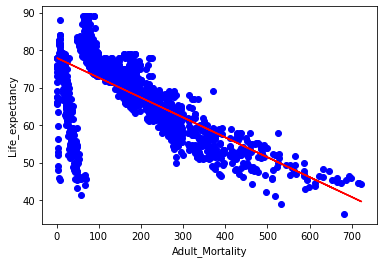

In [148]:
plt.scatter(train.Adult_Mortality, train.Life_expectancy,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Adult_Mortality")
plt.ylabel("Life_expectancy")

In [150]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Adult_Mortality']])
test_y = np.asanyarray(test[['Life_expectancy']])
test_x[np.isnan(test_x)] = np.median(test_x[~np.isnan(test_x)])
test_y[np.isnan(test_y)] = np.median(test_y[~np.isnan(test_y)])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 4.77
Residual sum of squares (MSE): 44.23
R2-score: 0.49
